# FASTEDDY TUTORIAL VISUALIZATION AND ANALYSIS NOTEBOOK

# 1. Run the tutorial definitions python file

In [73]:
%run fetutorialfunctions.py 

xarray==0.16.2
scipy==1.5.4
pandas==1.1.5
numpy==1.18.5
netCDF4==1.5.5
matplotlib==3.3.3


# 2. Define cases and data locations

In [74]:
##########################
# BEGIN USER EDIT REGION #
##########################

case = 'neutral'    # USER SELECTED CASE: 'stable', 'convective', or 'neutral'
zChoose = 5        # VERTICAL INDEX TO MAKE XY PLOTS
yChoose = 317 #64       # Y-INDEX TO TAKE XZ PLOTS: use 317-neutral 300-convective 64-stable for y-center
path_base = "/glade/scratch/erichend/FastEddy/tutorial/"    # BASE PATH FOR FE OUTPUT
cases_FE = ['neutral3','convective3','stable3'] # SUBDIRECTORY PATHS TO EACH CASE
path_end = "/output/"      # FOR EACH CASE, SUBDIRECTORY PATHS TO OUTPUT
output_base = ["FE_NBL.","FE_CBL.","FE_SBL."]  # OUTPUT FILE NAMES FOR EACH CASE (NBL: NEUTRAL, CBL: CONVECTIVE, and SBL: STABLE)
FE_timestep = ['504000','540000','4320000']    # FINAL TIME STEPS OF CASES
save_plot_opt = 1          # 0-DO NOT SAVE PLOTS, 1-SAVE PLOTS
path_figure = '/glade/scratch/erichend/FastEddy/plots/tutorial/' # BASE PATH TO FIGURES IF save_plot_opt=1
FE_timestep_NBL = ['432000','450000','468000','486000','504000'] # Output files used for temporal averaging (NBL)
FE_timestep_CBL = ['360000','396000','432000','468000','504000','540000'] # Output files used for temporal averaging (CBL)
FE_timestep_SBL = ['3600000','3780000','3960000','4140000','4320000'] # Output files used for temporal averaging (SBL)

########################
# END USER EDIT REGION #
########################

# 3. Open files

In [75]:
if case == 'neutral':
    indCase = 0
    FE_timestep_avg = FE_timestep_NBL
elif case == 'convective':
    indCase = 1
    FE_timestep_avg = FE_timestep_CBL
elif case == 'stable':
    indCase = 2
    FE_timestep_avg = FE_timestep_SBL

n_cases = len(cases_FE)
files_FE = []
for cc in range(0,len(cases_FE)):
    files_FE.append(path_base+cases_FE[cc]+path_end+output_base[cc]+FE_timestep[cc])

print('files_FE=',files_FE)

path_figure = path_figure + path_figure_out
if not os.path.exists(path_figure):
    os.makedirs(path_figure)
    
case_tmp = 'case_open'
case_open = case_tmp + '=xr.open_dataset(files_FE[indCase])'
print(case_open)
exec(case_open)

files_FE= ['/glade/scratch/erichend/FastEddy/tutorial/neutral3/output/FE_NBL.504000', '/glade/scratch/erichend/FastEddy/tutorial/convective3/output/FE_CBL.540000', '/glade/scratch/erichend/FastEddy/tutorial/stable3/output/FE_SBL.4320000']
case_open=xr.open_dataset(files_FE[indCase])


# 4. Plot XY cross sections 

/glade/scratch/erichend/FastEddy/plots/tutorial/tutorial/UVWTHETA-XY-neutral.png


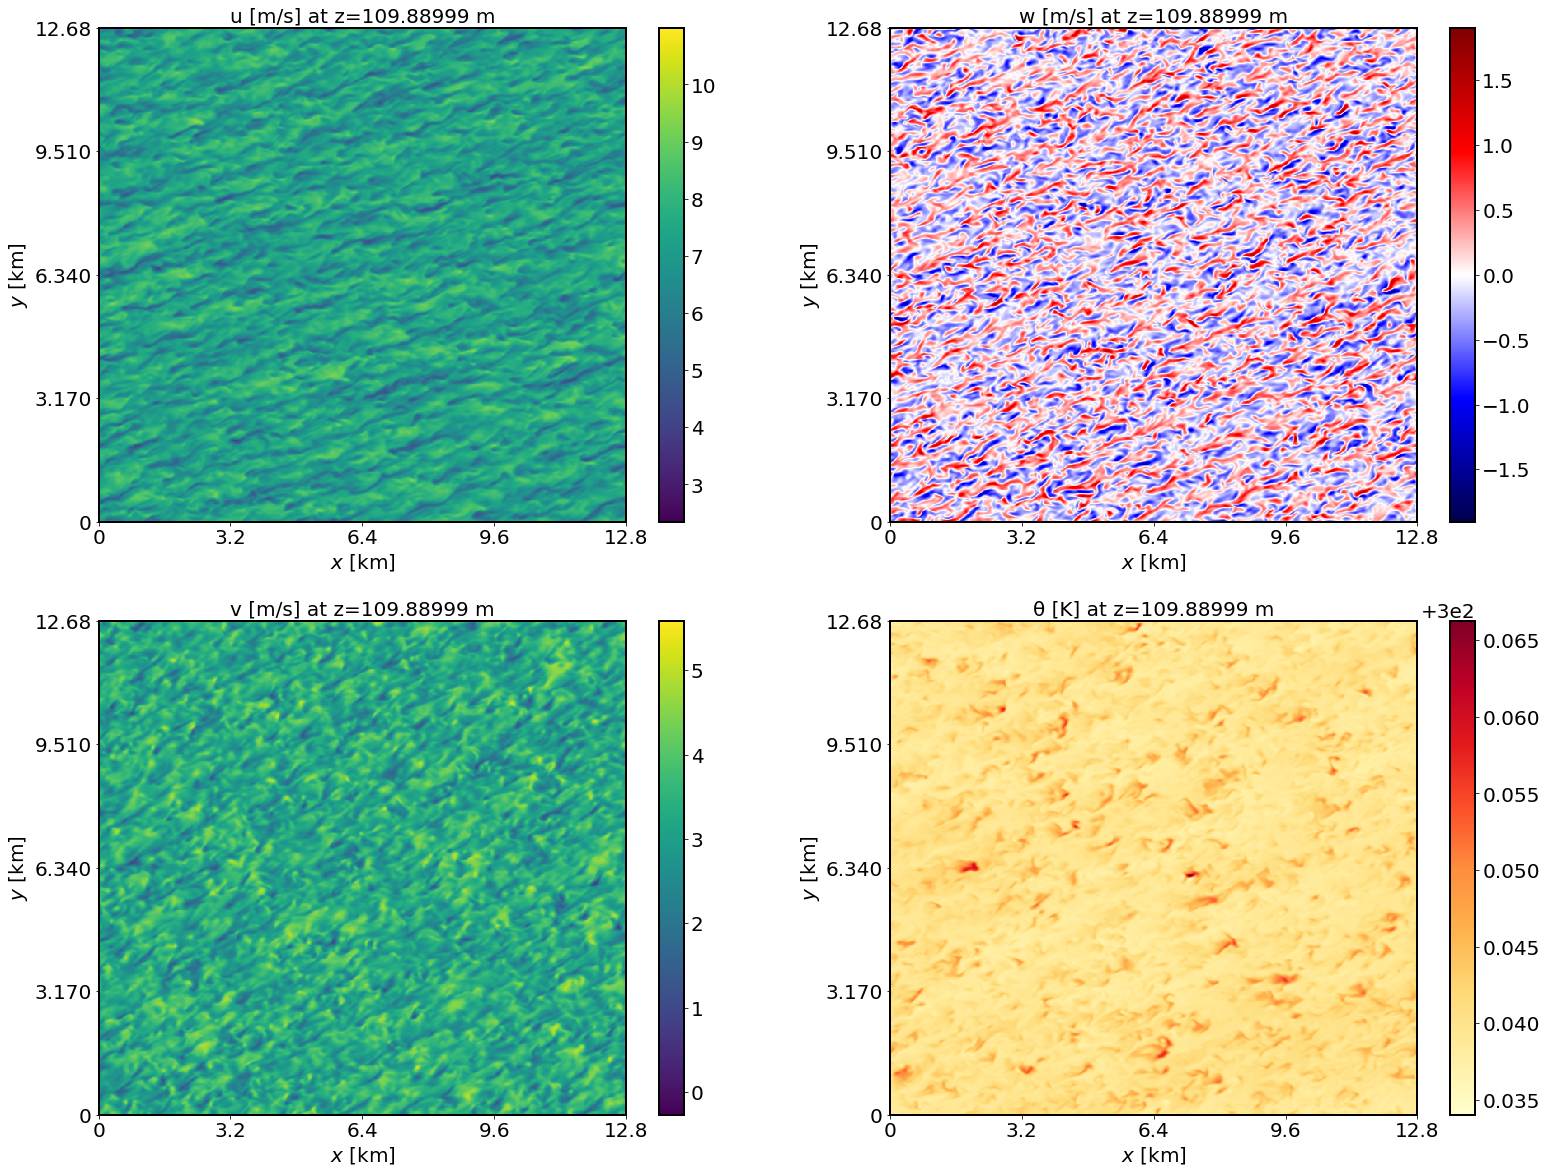

In [76]:
plot_XY_UVWTHETA(case, case_open, zChoose, save_plot_opt, path_figure)

# 5. Plot XZ cross sections 

1148.85
/glade/scratch/erichend/FastEddy/plots/tutorial/tutorial/UVWTHETA-XZ-neutral.png


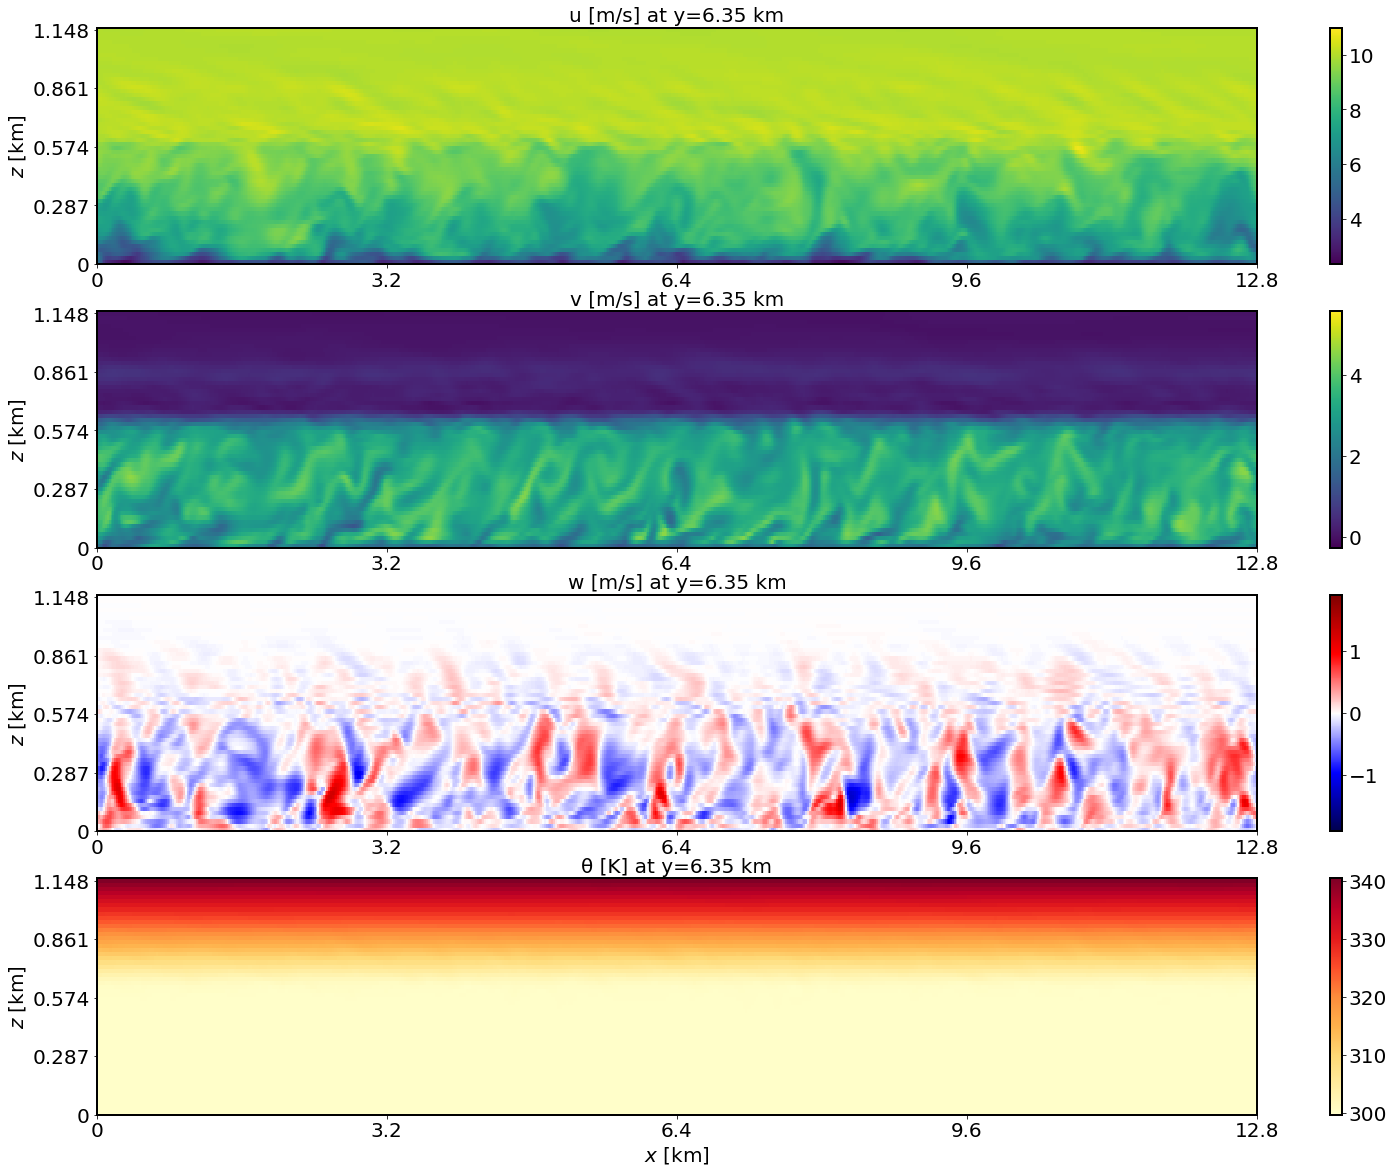

In [77]:
plot_XZ_UVWTHETA(case, case_open, yChoose, save_plot_opt, path_figure)

# 6. Plot mean vertical profiles 

(58, 640)
1.14885
(634, 640)
()


NameError: name 'case_0' is not defined

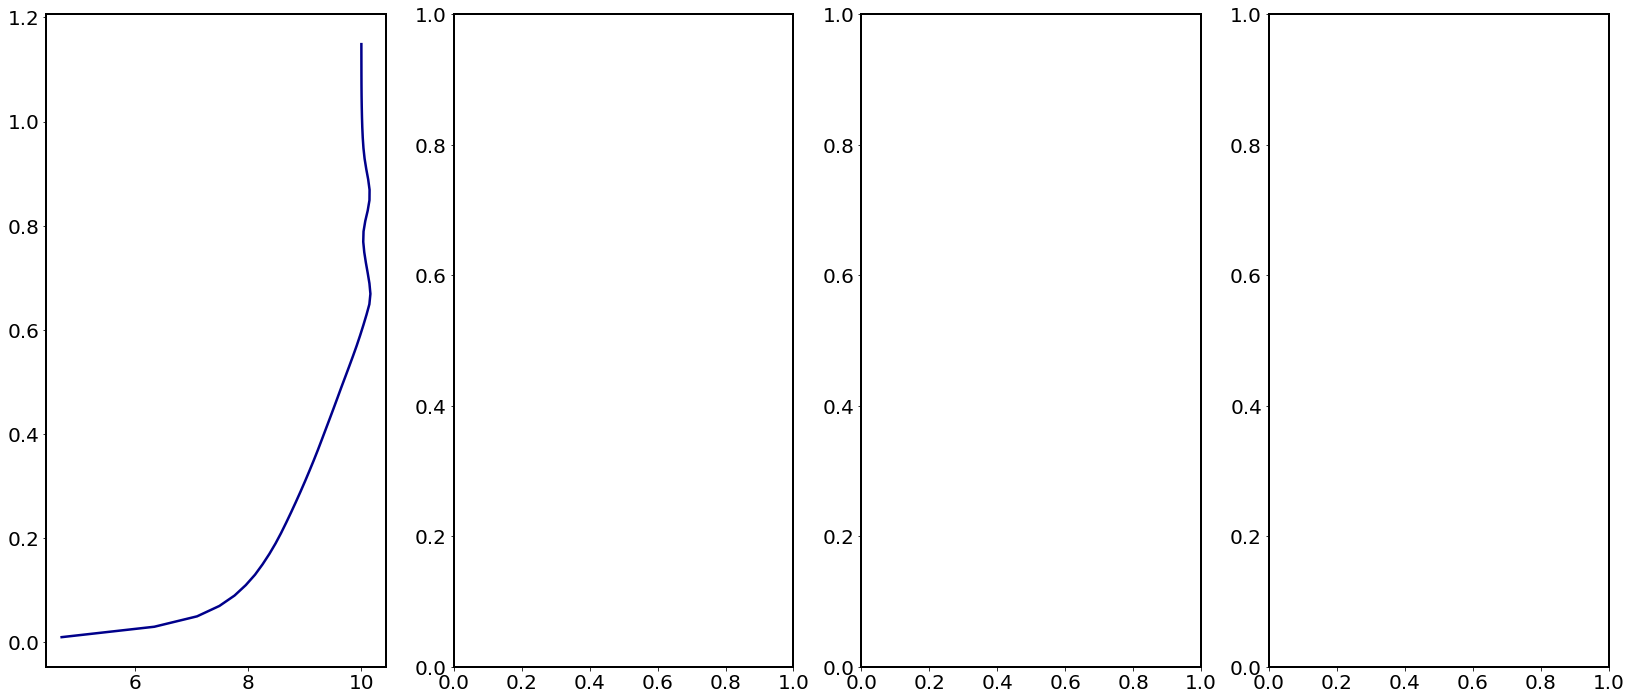

In [78]:
plot_mean_profiles(case, case_open, save_plot_opt, path_figure)

# 7. Plot turbulence profiles

In [ ]:
FE_turb_tmp=0.0
for dd in range(0,len(FE_timestep_avg)):
    file_FE_tmp = path_base+cases_FE[indCase]+path_end+output_base[indCase]+FE_timestep_avg[dd]
    print(file_FE_tmp)
    FE_turb_xr_tmp = xr.open_dataset(file_FE_tmp)
    FE_turb_tmp = compute_turb_profiles(FE_turb_xr_tmp, FE_turb_tmp, case, save_plot_opt, path_figure)
    
print(FE_turb_tmp.shape)

In [ ]:
plot_turb_profiles(case,case_open,FE_turb_tmp,save_plot_opt, path_figure)

In [ ]:
# Other plots TBD (spectra, etc.)